# Capstone Project - Fashion Boutique New Location in Toronto
## Applied Data Science Capstone by IBM/Coursera

# Table of contents
Introduction: Business Problem \
Data \
Methodology \
Analysis \
Results and Discussion \
Conclusion 

# Introduction: Business Problem

Miami-based multi-brand luxury retailer The Webster will open its first Canadian storefront in July of 2021 in Toronto. The Webster is expected to disrupt luxury retailing in the city with an innovate strategy that includes one-on-one clienteling and a selection of luxury goods that in some instances are not sold elsewhere.

The Webster was founded in 2009 when Laure Heriard Dubreuil opened a 20,000-square-foot store in the former Webster Hotel at 1220 Collins Avenue in South Beach, Miami. The Art Deco building spans three floors and became a draw for locals and tourists. “The idea was a place where you can feel very comfortable,” said Ms. Heriard Dubreuil of The Webster’s concept. “It’s a place to spend time. You arrive, you take off your shoes, you’re at someone’s house, or you’re in your gigantic closet, and you can try everything.” Rather than organize the store according to brand, Ms. Heriard Dubreuil merchandised it as if it were a personal wardrobe by mixing big brands with the emerging, arranging everything intuitively by mood, which was revolutionary at the time.

More than 100 of the industry’s leading fashion designers are available at The Webster stores including ready-to-wear for women, men, and kids. Brands include Alexander Wang, Amiri, Amina Muaddi, Balenciaga, Bottega Veneta, Burberry, Celine, Chanel, Chloé, Dior, Dries Van Noten, Fendi, Fear of God, Givenchy, Gucci, Heron Preston, Jacquemus, Khaite, LaQuan Smith, Loewe, Marine Serre, Off-White, Paco Rabanne, Palm Angels, Raf Simons, Rhude, Saint Laurent, and The Row among others. A private label brand called LHD, designed by the founder herself, adds an extra element of uniqueness with bold silhouettes and playful prints. The Webster also features an expanded assortment of products including fine jewellery, home goods and most recently, beauty products.

So in this project, I am going to utilize Foursquare location and data to answer which locations/neighborhoods would be ideal for The Webster new boutique and what are the potential gain and advantages in this neighborhood and what value it could bring to a fashion boutique.

#  Data

Based on definition of our problem, factors that will influence our decission are: \
number of existing fashion retailers in the neighborhood \
average foot trafic in the neighborhood, which could be implied by the neighborhood population number\
target customer group for fashion retailers such as The Webster 

I will use the foursquare location and local data to analyze the Yorkville neighborhood, including the analysis of business district, foot trafic, shopping malls and entertainment spots. \
I will find the top 10 venues in that neighborhood and see if the webster new boutique location is within one of the venue. \
Finally, I will conduct a competitive analysis and predict the webster performance after it opens the store in summer 2021.

In [1]:
# Let's first import all libraries for this project

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.2 MB/s eta 0:00:01
  Created wheel for folium: file

We will use beautiful soup to do the webscrapping and collect information about Toronto neighborhood information and we will import the respective latitude and logitute information. After creating this neighborhood dataset, we are ready to move to the next step by using foursquare to extract information about high-density retailer neighborhood information.

In [2]:
!pip3 install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
# impport the library and create a beautiful soup object:
import requests
from bs4 import BeautifulSoup
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [5]:
# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
import ibm_db

#Replace the placeholder values with the actuals for your Db2 Service Credentials
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_hostname = "dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net"            
dsn_port = "50000"                     
dsn_protocol = "TCPIP"          
dsn_uid = "mll31105"                 
dsn_pwd = "1lmb61gzz9j-z25q" 

#Create database connection
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  mll31105 on host:  dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net


In [7]:
!pip install sqlalchemy 
#importing sql library
from sqlalchemy import create_engine
  
# create a referrence 
# for sql library
engine = create_engine('sqlite://', 
                       echo = False)
  
# attach the data frame to the sql 
# with a name of the table 
df.to_sql('Neighborhood_Data',
               con = engine)
  
# show the complete data
# from Neighborhood_Data table
print(engine.execute("SELECT * FROM Neighborhood_Data").fetchall())

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
[(0, 'M3A', 'North York', 'Parkwoods'), (1, 'M4A', 'North York', 'Victoria Village'), (2, 'M5A', 'Downtown Toronto', 'Regent Park, Harbourfront'), (3, 'M6A', 'North York', 'Lawrence Manor, Lawrence Heights'), (4, 'M7A', "Queen's Park", 'Ontario Provincial Government'), (5, 'M9A', 'Etobicoke', 'Islington Avenue'), (6, 'M1B', 'Scarborough', 'Malvern, Rouge'), (7, 'M3B', 'North York', 'Don Mills North'), (8, 'M4B', 'East York', 'Parkview Hill, Woodbine Gardens'), (9, 'M5B', 'Downtown Toronto', 'Garden District, Ryerson'), (10, 'M6B', 'North York',

In [8]:
df2 = pd.read_sql('Neighborhood_Data',
                  con = engine, 
                 index_col = 'index')
df2

,PostalCode,Borough,Neighborhood
index,,,
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"


In [9]:
df3 = df2.sort_values(['PostalCode'])
df3

,PostalCode,Borough,Neighborhood
index,,,
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae
32,M1J,Scarborough,Scarborough Village
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
44,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
51,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"


In [10]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
Latitude = df_data_1.sort_values(['Postal Code'])
Latitude

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:
df_new = df3.rename(columns={'PostalCode': 'Postal Code'})
df_new.sort_values('index')

,Postal Code,Borough,Neighborhood
index,,,
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"


In [13]:
dataset = pd.merge(df_new, Latitude, on = 'Postal Code')
dataset

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [14]:
dataset1= dataset[dataset['Borough'].isin(['East Toronto', 'Downtown Toronto', 'Central Toronto', 'West Toronto'])]
dataset1

,Postal Code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [15]:
Toronto_data = dataset1.reset_index(drop=True)
Toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790



# Methodology

In this project we will direct our efforts on detecting areas of Toronto that have high fashion retailer density neighborhood and close to rich residential area.

In first step we have collected the required data and we do the clustering of Toronto city. We will identify the top 10 venues for each neighborhood in Toronto using Foursquare data and location information.

Second step in our analysis is to find out the neighborhoods that display high fashion retailer density. We will look into the top 5 venues and figure out the neighborhoods that people are coming to the top 5 venues and at least one of them is related to fashion, clothing, and jewelry.

The last step is a thorough comparison of the neighborhoods we picked up in previous steps. We will use Toronto census data and evaluate those neighborhoods from economic, business, safety, entertainment and other perspectives and decide which neighborhood(s) would be ideal for The Webster new location and reasons behind.


# Analysis


## Top Venues For Each Neighborhood

In [16]:
address = 'Central Toronto,ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.6534817, -79.3839347.


In [17]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [18]:
#Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.
nearby_venues1 = pd.read_json("https://raw.githubusercontent.com/ibm-developer-skills-network/yczvh-DataFilesForIBMProjects/master/segmenting_neighborhoods.json")    
nearby_venues1.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                 'Venue', 
                 'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']
Toronto_venues=nearby_venues1

In [19]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1337, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant


In [20]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
Berczy Park,30,30,30,30,30,30
"Birch Cliff, Cliffside West",5,5,5,5,5,5
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17


In [21]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 241 uniques categories.


In [22]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
Toronto_grouped =Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00

In [24]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4        Monument / Landmark  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.25
1      Pharmacy  0.12
2   Coffee Shop  0.12
3  Skating Rink  0.12
4           Pub  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.09
1                Coffee Shop  0.09
2                Pizza Place  0.04
3                 Restaurant  0.04
4  Middle Eastern Restaurant  0.04


----Bayview Village----
                 venue  freq
0                 Bank  0.25
1                 Café  0.25
2   Chinese Restaurant  0.25
3  Japanese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.09
1              Coffee Shop  0

In [25]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Women's Store,Deli / Bodega,Drugstore,Donut Shop,Dog Run,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Skating Rink,Pharmacy,Pub,Sandwich Place,Coffee Shop,Gym,Gas Station,Coworking Space,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Diner,Bridal Shop,Supermarket,Restaurant,Sushi Restaurant,Ice Cream Shop,Middle Eastern Restaurant,Mobile Phone Shop
3,Bayview Village,Bank,Chinese Restaurant,Japanese Restaurant,Café,Women's Store,Deli / Bodega,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Thai Restaurant,Liquor Store,Juice Bar,Indian Restaurant,Restaurant,Sushi Restaurant


## K Means - Clustering of Toronto Neighborhood

In [27]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_data

# merge Toronto_grouped with Toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Pub,Trail,Health Food Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Women's Store,Cupcake Shop
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4,Greek Restaurant,Italian Restaurant,Ice Cream Shop,Spa,Pub,Pizza Place,Juice Bar,Grocery Store,Furniture / Home Store,Fruit & Vegetable Store
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,4,Park,Pizza Place,Fast Food Restaurant,Pet Store,Pub,Board Shop,Brewery,Sandwich Place,Italian Restaurant,Steakhouse
3,M4M,East Toronto,Studio District,43.659526,-79.340923,4,Coffee Shop,Café,American Restaurant,Bakery,Yoga Studio,Pet Store,Stationery Store,Bookstore,Brewery,Seafood Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Bus Line,Park,Swim School,Women's Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,Pizza Place,Breakfast Spot,Hotel,Sandwich Place,Department Store,Food & Drink Shop,Gym / Fitness Center,Park,Discount Store,Curling Ice
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,4,Clothing Store,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Chinese Restaurant
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,4,Dessert Shop,Coffee Shop,Gym,Sandwich Place,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Pharmacy,Brewery
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Lawyer,Park,Trail,Summer Camp,Drugstore,Donut Shop,Dog Run,Distribution Center,Curling Ice,Eastern European Restaurant
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,4,Coffee Shop,Café,Sushi Restaurant,Supermarket,Bagel Shop,Pub,Bank,Fried Chicken Joint,American Restaurant,Pizza Place


In [29]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Ideal Neighborhoods for Fashion Retailer

Since our goal is to seperate which neighborhoods would be ideal for The Webster new boutique location. As mentioned before, we are looking for a place that is on the popular venue for shopping, including clothing, jewelry, shoes, and leather goods. Besides, this place should also be close to rich neighborhood or within residential area, given that the target group of customers for The Webster is middle and upper class who are able to afford luxury merchandises. So now, let's first find out the neighborhoods where more than 1 venue is related to shopping among the top 5 venues.

In [34]:
# Firstly, let's slice the top 5 venues for each neighborhood
Toronto_top= Toronto_merged[['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude', '1st Most Common Venue', '2nd Most Common Venue', 
                            '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']]
Toronto_top_frame=pd.DataFrame(Toronto_top)
Toronto_top_frame

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Pub,Trail,Health Food Store,Dance Studio,Deli / Bodega
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Greek Restaurant,Italian Restaurant,Ice Cream Shop,Spa,Pub
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,Park,Pizza Place,Fast Food Restaurant,Pet Store,Pub
3,M4M,East Toronto,Studio District,43.659526,-79.340923,Coffee Shop,Café,American Restaurant,Bakery,Yoga Studio
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Bus Line,Park,Swim School,Women's Store,Eastern European Restaurant
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,Pizza Place,Breakfast Spot,Hotel,Sandwich Place,Department Store
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,Clothing Store,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Ice Cream Shop
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,Dessert Shop,Coffee Shop,Gym,Sandwich Place,Italian Restaurant
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,Lawyer,Park,Trail,Summer Camp,Drugstore
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,Coffee Shop,Café,Sushi Restaurant,Supermarket,Bagel Shop


In [35]:
# we will find out the neighborhood containing clothing store or department store as top venue 
Toronto_Fashion = Toronto_top_frame[Toronto_top_frame[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']].isin(['Clothing Store', "Women's Store"])]
Toronto_Fashion.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's Store,NaN


In [36]:
# we drop all the NaN value rows and only leave the rows containing clothing store or women's store
Toronto_Fashion.dropna(how='all')

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's Store,NaN
6,NaN,NaN,NaN,NaN,NaN,Clothing Store,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's Store,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clothing Store,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's Store,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's Store


In [37]:
# we find out the postal code and neighborhood information of these 6 community
Toronto_top_frame.loc[[4, 6, 10, 14, 22, 23]]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Bus Line,Park,Swim School,Women's Store,Eastern European Restaurant
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,Clothing Store,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Ice Cream Shop
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,Park,Playground,Trail,Women's Store,Diner
14,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Café,Theater,Clothing Store,Sporting Goods Shop,Hotel
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,Health & Beauty Service,Garden,Women's Store,Curling Ice,Eastern European Restaurant
23,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,Park,Sushi Restaurant,Jewelry Store,Trail,Women's Store


Now we have discovered the top 6 neighboorhoods which would be ideal for The Webster new boutique in location in Toronto since each of them has good traffic to clothing store and department store. The next question is whether these neighborhoods are close to rich residential area, and its safety score given that most of merchandise are high-luxury products and the target customers are rich people. We will use data that I collect from Toronto census open data source, including Toronto housing metadata and Toronto safety metadata.

## Neighborhood Comparison 

#### Housing Data Comparison
From here, we'd like to know which neighborhoods are close to rich residential area. Here, I am going to use data downloaded from Toronto Open Data source, including the following tables. We will mainly focus on comparing the household median income, safety score, and population for the 6 neighborhoods and figure out the advantages and disadvantages of each neighborhood.
1. Wellbeing Toronto - Demographics: NHS Indicators https://open.toronto.ca/dataset/wellbeing-toronto-demographics-nhs-indicators/
2. Wellbeing Toronto - Housing https://open.toronto.ca/dataset/wellbeing-toronto-housing/
3. Wellbeing Toronto - Safety https://open.toronto.ca/dataset/wellbeing-toronto-safety/
4. Wellbeing Toronto - Economics https://open.toronto.ca/dataset/wellbeing-toronto-economics/

In [38]:

body = client_12ba7356f4104f319649b913b8e16f19.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-yn5vqlt6mmalvs',Key='demographics-nhs-indicators-2011-2012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

NHS_Indicators = pd.read_csv(body)
NHS_Indicators.head()


,Hood#,Total Population,Child0-14,Youth15-24,Seniors65,Total visible minority population,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,"Visible minority, n.i.e.",Multiple visible minorities,Not a visible minority,Total - Mobility status 5 years ago,Non-movers,Movers,Total recent immigrant population in private households by selected places of birth,Middle East/Western Asia,Eastern,South East,Southern,Other places of birth in Asia,Americas w/o USA,Europe,Africa,Total population aged 15 years and over by labour force status,In the labour force,Unemployed,Not in the labour force,"No certificate, diploma or degree","College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Total number of private households by tenure,Owner,Renter,% of owner households spending 30% or more of household total income on shelter costs,Major repairs needed,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,Median after-tax household income $
0,ID,popt01,popt201,popt202,popt204,vismin01,vismin04,vismin05,vismin03,vismin09,vismin11,vismin15,vismin08,vismin16,vismin06,vismin07,vismin14,vismin13,vismin17,res5_1,res1_2,res1_3,recbirth1,recbirth68,recbirth69,recbirth73,recbirth76,NaN,recbirth51,recbirth52,recbirth61,plf15_1,plf15_2,plf15_4,plf15_5,higheda02,higheda03,higheda09,occprdw20,occprdw05,occprdw06,shelter30,occprdw11,occprdw21,infamtx12,incprhh01,incprhh14,incprhh58
1,1,34100,5970,5405,4305,26475,13080,695,6385,1470,1220,235,820,220,100,55,1615,580,6855,31460,20635,10820,2750,0,65,250,1495,40.0,530,40,260,27365,17610,1750,9755,6170,4375,1445,10130,7075,3050,27.9,415,945,72820,10130,66241,59703
2,2,32790,7665,5020,2945,28175,12720,200,8285,680,870,1605,560,1160,85,0,1565,435,4525,30105,16210,13895,5850,1380,0,120,2625,30.0,710,75,830,24980,14655,2175,10320,6855,3325,1090,9610,4540,5070,33.3,1100,921,57411,9610,49934,46986
3,3,10140,1825,1350,1745,6285,2285,105,1530,485,670,210,200,285,0,10,225,275,3705,9380,6290,3085,1070,195,0,80,400,0.0,190,15,130,8135,4825,530,3315,1970,1180,650,3225,2080,1145,25.1,170,887,70838,3225,62042,57522
4,4,10485,1585,1315,1915,4425,1435,200,1025,245,650,55,85,40,90,50,385,175,5735,9705,6890,2815,800,0,35,20,405,0.0,255,50,0,8600,5270,590,3330,2095,1450,350,3945,2010,1935,19.7,340,857,69367,3945,56545,51194


In [39]:
NHS_Indicators1 = NHS_Indicators[['Hood#', 'Total Population','  Median household total income $']]

In [40]:
NHS_Indicators2 = NHS_Indicators1.rename(columns={'Hood#': 'Neighborhood Id'})
NHS_Indicators3 = NHS_Indicators2.drop(0)
NHS_Indicators3.reset_index(drop=True, inplace=True)
NHS_Indicators3

,Neighborhood Id,Total Population,Median household total income $
0,1,34100,66241
1,2,32790,49934
2,3,10140,62042
3,4,10485,56545
4,5,9550,50846
5,6,21725,55454
6,7,21345,63701
7,8,10580,60410
8,9,14945,71646
9,10,11200,114844


In [41]:

body = client_12ba7356f4104f319649b913b8e16f19.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-yn5vqlt6mmalvs',Key='wellbeing-toronto-housing .csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Toronto_Housing = pd.read_csv(body)
Toronto_Housing.head()


,Neighbourhood,Neighbourhood Id,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List,Unnamed: 11
0,West Humber-Clairville,1,317508,690,1810,6.8,5.3,38,0.312500,952,557,NaN
1,Mount Olive-Silverstone-Jamestown,2,251119,4110,13395,42.9,40.9,41,7.000000,1146,1049,NaN
2,Thistletown-Beaumond Heights,3,414216,430,1260,13.4,12.4,7,1.333333,447,270,NaN
3,Rexdale-Kipling,4,392271,600,1050,15.2,10.0,19,4.200000,432,186,NaN
4,Elms-Old Rexdale,5,233832,870,2305,27.3,24.1,14,1.000000,463,239,NaN


In [42]:
Toronto_Housing1 = Toronto_Housing[['Neighbourhood', 'Neighbourhood Id', 'Home Prices']]
Toronto_Housing2 = Toronto_Housing1.rename(columns = {'Neighbourhood Id':'Neighborhood Id', 'Neighbourhood':'Neighborhood'})
Toronto_Housing2

,Neighborhood,Neighborhood Id,Home Prices
0,West Humber-Clairville,1,317508
1,Mount Olive-Silverstone-Jamestown,2,251119
2,Thistletown-Beaumond Heights,3,414216
3,Rexdale-Kipling,4,392271
4,Elms-Old Rexdale,5,233832
5,Kingsview Village-The Westway,6,292861
6,Willowridge-Martingrove-Richview,7,511637
7,Humber Heights-Westmount,8,491396
8,Edenbridge-Humber Valley,9,873268
9,Princess-Rosethorn,10,971668


In [43]:

body = client_12ba7356f4104f319649b913b8e16f19.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-yn5vqlt6mmalvs',Key='wellbeing-toronto-safety (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Toronto_safety = pd.read_csv(body)
Toronto_safety.head()


,Unnamed: 0,Unnamed: 1,Safety,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
1,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
2,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
3,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12
4,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18


In [44]:
Toronto_safety1 = Toronto_safety[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 4', 'Unnamed: 13']]
Toronto_safety1

,Unnamed: 0,Unnamed: 1,Unnamed: 4,Unnamed: 13
0,Neighbourhood,Neighbourhood Id,Break & Enters,Thefts
1,West Humber-Clairville,1,175,54
2,Mount Olive-Silverstone-Jamestown,2,61,7
3,Thistletown-Beaumond Heights,3,36,2
4,Rexdale-Kipling,4,32,3
5,Elms-Old Rexdale,5,25,19
6,Kingsview Village-The Westway,6,59,8
7,Willowridge-Martingrove-Richview,7,66,8
8,Humber Heights-Westmount,8,28,1
9,Edenbridge-Humber Valley,9,75,5


In [45]:
Toronto_safety2 = Toronto_safety1.rename(columns = {'Unnamed: 0':'Neighborhood', 'Unnamed: 1':'Neighborhood Id', 'Unnamed: 4':'Break&Enters', 'Unnamed: 13':'Thefts'})
Toronto_safety3 = Toronto_safety2.drop(0)
Toronto_safety3.reset_index(drop=True, inplace=True)
Toronto_safety3

,Neighborhood,Neighborhood Id,Break&Enters,Thefts
0,West Humber-Clairville,1,175,54
1,Mount Olive-Silverstone-Jamestown,2,61,7
2,Thistletown-Beaumond Heights,3,36,2
3,Rexdale-Kipling,4,32,3
4,Elms-Old Rexdale,5,25,19
5,Kingsview Village-The Westway,6,59,8
6,Willowridge-Martingrove-Richview,7,66,8
7,Humber Heights-Westmount,8,28,1
8,Edenbridge-Humber Valley,9,75,5
9,Princess-Rosethorn,10,50,9


In [46]:
Comparison_dataset = pd.concat([Toronto_safety3, Toronto_Housing2, NHS_Indicators3], axis = 1)
Comparison_dataset

,Neighborhood,Neighborhood Id,Break&Enters,Thefts,Neighborhood,Neighborhood Id,Home Prices,Neighborhood Id,Total Population,Median household total income $
0,West Humber-Clairville,1,175,54,West Humber-Clairville,1,317508,1,34100,66241
1,Mount Olive-Silverstone-Jamestown,2,61,7,Mount Olive-Silverstone-Jamestown,2,251119,2,32790,49934
2,Thistletown-Beaumond Heights,3,36,2,Thistletown-Beaumond Heights,3,414216,3,10140,62042
3,Rexdale-Kipling,4,32,3,Rexdale-Kipling,4,392271,4,10485,56545
4,Elms-Old Rexdale,5,25,19,Elms-Old Rexdale,5,233832,5,9550,50846
5,Kingsview Village-The Westway,6,59,8,Kingsview Village-The Westway,6,292861,6,21725,55454
6,Willowridge-Martingrove-Richview,7,66,8,Willowridge-Martingrove-Richview,7,511637,7,21345,63701
7,Humber Heights-Westmount,8,28,1,Humber Heights-Westmount,8,491396,8,10580,60410
8,Edenbridge-Humber Valley,9,75,5,Edenbridge-Humber Valley,9,873268,9,14945,71646
9,Princess-Rosethorn,10,50,9,Princess-Rosethorn,10,971668,10,11200,114844


In [47]:
Comparison_final = Comparison_dataset.loc[:,~Comparison_dataset.columns.duplicated()]
Comparison_final

,Neighborhood,Neighborhood Id,Break&Enters,Thefts,Home Prices,Total Population,Median household total income $
0,West Humber-Clairville,1,175,54,317508,34100,66241
1,Mount Olive-Silverstone-Jamestown,2,61,7,251119,32790,49934
2,Thistletown-Beaumond Heights,3,36,2,414216,10140,62042
3,Rexdale-Kipling,4,32,3,392271,10485,56545
4,Elms-Old Rexdale,5,25,19,233832,9550,50846
5,Kingsview Village-The Westway,6,59,8,292861,21725,55454
6,Willowridge-Martingrove-Richview,7,66,8,511637,21345,63701
7,Humber Heights-Westmount,8,28,1,491396,10580,60410
8,Edenbridge-Humber Valley,9,75,5,873268,14945,71646
9,Princess-Rosethorn,10,50,9,971668,11200,114844


Now we have generated the final dataset for comparison analysis of the 6 neighborhoods we picked up in the previous section. Next, we are going to plot these neighborhoods and analyze characteristics of each neighborhood.

In [48]:
Comparison_6 = Comparison_final.loc[[40, 102, 97, 74, 38, 100]]
Comparison_6

,Neighborhood,Neighborhood Id,Break&Enters,Thefts,Home Prices,Total Population,Median household total income $
40,Bridle Path-Sunnybrook-York Mills,41,50,4,1849084,8715,208674
102,Lawrence Park South,103,109,4,1215390,15075,127853
97,Rosedale-Moore Park,98,82,9,1265389,20635,88855
74,Church-Yonge Corridor,75,143,13,410703,28345,47195
38,Bedford Park-Nortown,39,219,18,1191040,23185,90934
100,Forest Hill South,101,58,7,1585984,10925,78269


### Neighborhood Comparison - Household Income 

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [50]:
Comparison_6.dtypes

Neighborhood                         object
Neighborhood Id                      object
Break&Enters                         object
Thefts                               object
Home Prices                           int64
Total Population                     object
  Median household total income $    object
dtype: object

In [51]:
convert_dict = {'Break&Enters': int,
                'Thefts': int,
                'Total Population': int, 
                '  Median household total income $':float
               }
Comparison_6 = Comparison_6.astype(convert_dict)
print(Comparison_6.dtypes)

Neighborhood                          object
Neighborhood Id                       object
Break&Enters                           int64
Thefts                                 int64
Home Prices                            int64
Total Population                       int64
  Median household total income $    float64
dtype: object


Text(0.5, 1.0, '6 Neighborhood Comparison - Household Income')

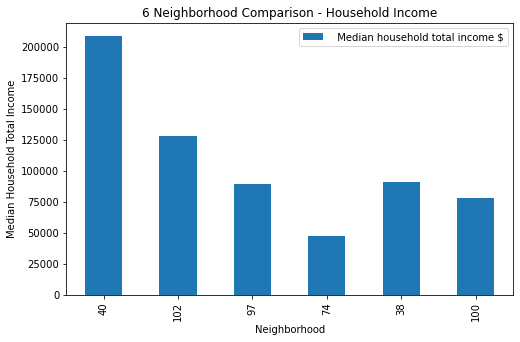

In [52]:
Comparison_6_Income = Comparison_6[['Neighborhood', '  Median household total income $']]
Comparison_6_Income.plot(kind='bar', figsize=(8,5))
plt.xlabel('Neighborhood')
plt.ylabel('Median Household Total Income')
plt.title('6 Neighborhood Comparison - Household Income')

Conclusion: From the above bar chart, we can see that the median household income in Bridle Path-Sunnybrook-York Mills (M4N) is much higher than the rest of neighborhoods, and Church_Yonge Corridor (M5B) is the lowest among the 6, the rest are quite evenly. 

### Neighborhood Comparison - Home Prices

In [53]:
Comparison_Home = Comparison_6[['Neighborhood', 'Home Prices', 'Total Population']]
Comparison_Home

,Neighborhood,Home Prices,Total Population
40,Bridle Path-Sunnybrook-York Mills,1849084,8715
102,Lawrence Park South,1215390,15075
97,Rosedale-Moore Park,1265389,20635
74,Church-Yonge Corridor,410703,28345
38,Bedford Park-Nortown,1191040,23185
100,Forest Hill South,1585984,10925


Text(0.5, 1.0, '6 Neighborhood Comparison - Home Prices')

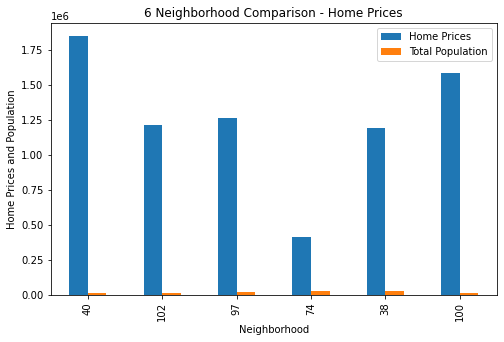

In [54]:
Comparison_Home.plot(kind='bar', figsize=(8,5))
plt.xlabel('Neighborhood')
plt.ylabel('Home Prices and Population')
plt.title('6 Neighborhood Comparison - Home Prices')

Conclusion: From the above bar chart, we can see that the home prices in Bridle Path-Sunnybrook-York Mills (M4N) is the highest, and Forest Hill South (M59) is the 2nd highest. However, the home prices in Church_Yonge Corridor (M5B) is much lower compared with the rest neighborhoods, even though it has the most population.

### Neighborhood Comparison - Safety
Since The Webster is a high-luxury fashion boutique and the majority of it's merchandies are expensive products. It's essentially important to consider the neighborhood's safety score, especially the break-in cases and thefts cases.

In [55]:
Comparison_safety = Comparison_6[['Neighborhood', 'Break&Enters', 'Thefts']]
Comparison_safety

,Neighborhood,Break&Enters,Thefts
40,Bridle Path-Sunnybrook-York Mills,50,4
102,Lawrence Park South,109,4
97,Rosedale-Moore Park,82,9
74,Church-Yonge Corridor,143,13
38,Bedford Park-Nortown,219,18
100,Forest Hill South,58,7


Text(0.5, 1.0, '6 Neighborhood Comparison - Safety Score')

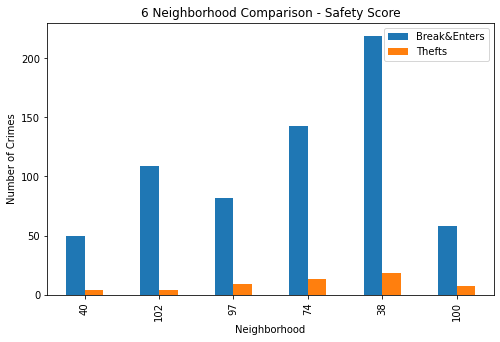

In [56]:
Comparison_safety.plot(kind='bar', figsize=(8,5))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.title('6 Neighborhood Comparison - Safety Score')

Conclusion: From the above bar chart, we can see that the number of crime cases in Bridle Path-Sunnybrook-York Mills (M4N) and Forest Hill South (M59) are the lowest. The rest of neighborhoods all have relatively high numbers of crime cases. 

# Results and Discussion 

In order to choose an ideal location for The Webster to open up a boutique in a brand new market, I first made thorough preparation work and picked up top 6 neighborhoods in Toronto city that have clothing store or fashion related venues amond the top 5 venues. In other words, those venues are people's top choices to stop by when they come to the neighborhood. And if fashion is one of the top choice, we would expect pretty good foot traffic to the area if The Webster opens a new store there. 

After seperating 6 neighborhoods, I analyzed the 6 neighborhoods' business, safety, population aspects to find the most suitable location. Below are elements that have been considered:

1.Target customer group for The Webster. As mentioned early, The Webster is a fashion company that carries high-luxury brands products. The company wants to provide an unique and private shopping experience for its customers. From this, we know that the target customers for The Webster is middle and upper class in Toronto, those who are able to afford high-end expensive products and who also have the need to make purchases regularly for different occasions. So I used Canada census data and plotted neighborhoods' median household income, population and home price. And I found that neighborhood M4N, which stands for Bridle Path-Sunnybrook-York Mills neighborhood, is close to rich residential area that could be reflected by the median household income data and the average home price. Meanwhile, M4N area has relative low population density, which could provide a quiter and private shopping experience. 

2.Safety issue. Even though high-luxury companies would buy insurance to make sure that they get covered when break-in and thefts happened, but it would be much better to have a store located in a relatively safer area. So I checked the top 6 neighborhood crime cases and found that M4N has the lowest crime cases filed. In other words, M4N is relatively safer than the rest of neighborhoods.

# Conclusion

Through the previous analysis and discussion, it turns out that M4N is an ideal location for The Webster to open its first store in the Toronto City. 

Firstly, the neighborhood is close to rich residential area, where the store target customers live in. I would expect good amount of foot traffic to the store, and also good sales performance based on ADT (Average dollars of Transaction) and UPT (Units per Transaction). 

Secondly, the neighborhood is pretty safe and quieter, which would be ideal for providing private shopping experience. 

Lastly, among the top 5 venues in M4N neighborhood, women's store is one of the top venue. So we would expect local people or tourists to stop by this neighborhood for shopping and entertainment. 

Similar analysis could be conducted for other fashion retailers as well, however, it might be necessary to consider the demographic element for certain brands. For example, if we are going to choose a new store location for CHANEL, we might want it to be close to where Europeans and French people live. Since The Webster contains all sorts of brands, it won't be necessary  to take this element into consideration.